The example below shows how to calculate the mean, standard deviation and standard deviation of the mean for a set of data $x_i$.  We will import the numerical python library (numpy) which has routines to do this


In [30]:
import numpy as np
xdata = [27.94, 27.96, 27.99, 27.97, 28.00, 27.93,27.96, 27.98] # the set of data points
xdata = np.array(xdata)  # turn xdata from a list of anything, into an array of numbers
# this step is important, for example xdata +3 would add 3 to everything in xdata after turning it into an array
# but would result in an error "you cant add a number to a list" before turning into an array
xbar = np.mean(xdata)
print('The mean of xdata is {0:7.3f}'.format(xbar)) 
# note in {0:7.3f} means take the first argument from format 
# and print it with 7 places putting 3 after the decimal point
#
# Lets check the mean by hand
#
xbar2 = 0
for xi in xdata:
  xbar2 += xi
xbar2 /= len(xdata) #len(xdata) returns the number of elements
print('Comparing xbar = {0:7.3f} with xbar2 = {1:7.3f}'.format(xbar,xbar2))


The mean of xdata is  27.966
Comparing xbar =  27.966 with xbar2 =  27.966


In [31]:
# now calculate standard deviations
# note the synatx for printing two different things
sigx = np.std(xdata) 
print('The standard deviation of xdata is {0:7.3f}'.format(sigx))
# lets check numpy by hand
sigx2 = 0
for xi in xdata:
  sigx2 += (xi-xbar)**2
sigx2 /= len(xdata-1)
sigx2 = np.sqrt(sigx2)
print('Comparing sigx = {0:7.4f} with sigx2 = {1:7.4f}'.format(sigx,sigx2)) # note how I used 4 decimal places this time
# now find the standard deviation of the mean
sigxbar = sigx/np.sqrt(len(xdata))
plusminus = u'\u00b1'
#now print out things properly
print('The correct way to print the mean of x is\n<x> = {0:5.2f} {1:s} {2:4.2f}'.format(xbar,plusminus,sigx))
# here I used <x> to indicate the mean. 
# note how I used the proper number of significant digits with the format 4.2f
# got fancy putting in a line feed "\n" and the +- symbol as unicode.  Feel free to use +- if you want

The standard deviation of xdata is   0.022
Comparing sigx =  0.0223 with sigx2 =  0.0223
The correct way to print the mean of x is
<x> = 27.97 ± 0.02


Now you try it:  use the data points 5.44, 3.71, 4.12, 8.76, 6.22
Use the Insert menu to insert a new code cell below this text cell to put your 
calculation in. 

## Combining errors

Lets consider an example: Calculate the force, $F$, and its uncertainty $\sigma_F$ , based on the gravitational force law 

$$ F=\frac{G m_1 m_2}{r^2}$$

We use the rule that if $f(x,y,z) = kx^ay^bz^c$ with $k$ a constant, then 

$$
\frac{\delta f}{f} = \sqrt{\left(\frac{a\delta x}{x}\right)^2 +
\left(\frac{b\delta y}{y}\right)^2
\left(\frac{c\delta z}{z}\right)^2}
$$

Here $x = m_1$, $a = 1$, $y = m_2$, $b = 1$ and $z = r$ with $c = -2$, so 

$$
\frac{\delta F }{F}= \sqrt{\left(\frac{\delta m_1}{m_1}\right)^2 + 
\left(\frac{\delta m_2}{m_2}\right)^2 + 
\left(\frac{2\delta r}{r}\right)^2}
$$ 
The data is: $m_1=9.7\pm0.2$ kg, $m_2 = 9.4\pm0.2$ kg, $r=0.641\pm0.009$ m.  You can treat $G$ as a constant with no error  $G=6.67\times10^{-11} $Nm$^2$/kg$^2$.  

In [29]:
m1 = 9.7
dm1 = 0.2
m2 = 9.4
dm2 = 0.2 
G = 6.67e-11
r = 0.631
dr = 0.009
F = G*m1*m2/r**2
dF = np.sqrt((dm1/m1)**2+(dm2/m2)**2+(2*dr/r)**2)
print('The force is F = {0:4.2e} +- {1:2.0e} N'.format(F,dF*F)) # note correct use of significant digits
# Also note how I used a new formater 4.2e, "e" means use exponential notation.

The force is F = 1.53e-08 +- 6e-10 N


Now you try it.  The index of refraction of glass is to be calculated using Snell’s law of refraction: 

$$n_g = n_{air}\sin\left(\theta_{air}\right)/\sin\left(\theta_{g}\right)$$

Calculate the index of refraction and its uncertainty from the following data 

$n_{air} = 1.000$, $\theta_{air} = 61 \pm  2^\circ$ , $\theta_g = 36 \pm 1^\circ$ .  Hint, trig functions are np.sin and np.cos, you can convert from degrees to radians by multiplying by np.pi/180.

Now let's try linear regression. Exercise 4b

In [65]:
v = [-0.55, -0.19, -0.09, 0.01, 0.36, 0.56, 0.65, 0.85, 1.17]
v = np.array(v)
t = np.arange(9)  # this automatical generates [1,2,3,4,5,6,7,8,9]
[m, b] = np.polyfit(t,v, 1)
print('The slope of the fitline is {0:4.2f} m^2/s and the intercept is {1:4.2f} m/s'.format(m,b))


The slope of the fitline is 0.20 m^2/s and the intercept is -0.49 m/s


In [42]:
# But this doesn't give the uncertainties in the fit parameters.  For that 
# you can can set cov=True
p,cov = np.polyfit(t,v,1,cov=True)
dm, db = np.sqrt(np.diag(cov))  
# why sqrt(diag(cov))?  cov is a matrix of covariance, and not only gives the
# errors in slope and intercept, but the degree to which the two parameters
#  are correlated.  This is fancy stuff, and you ignore it for this class. 
# instead just use np.sqrt(np.diag(cov)) and trust that it works
print('The slope of the fitline is {0:4.2f} +- {1:4.2f} m^2/s'.format(m,dm))
print(' and the intercept is {0:4.2} +- {1:4.2f} m/s'.format(b,db))

The slope of the fitline is 0.20 +- 0.01 m^2/s
 and the intercept is -0.49 +- 0.05 m/s


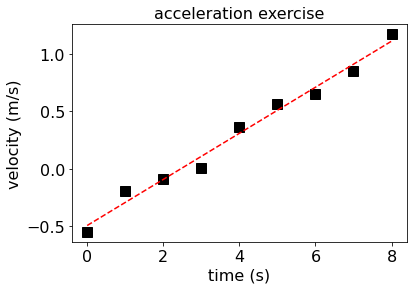

In [46]:
# now plot the line and fit
from matplotlib import pyplot as plt
import matplotlib
plt.figure('grades')
plt.plot(t,v,'ks',markersize=10)
plt.ylabel('velocity (m/s)')
plt.xlabel('time (s)')
plt.title('acceleration exercise')
plt.plot(t, m*t + b,'--r')

Now try one on your own.

The resistance of a tungsten wire is proportional to the absolute temperature in Kelvin. The table below gives data for a flashlight bulb. Fit the data to a straight line using LINEST and use the intercept to find the temperature of absolute zero in Celsius. Find the uncertainty in the value of your final result as well. Plot your data against your fit on the same graph and label the axes properly.


|R (Ohms) |	Color	 | T (C) |
---------|---------| --------|
15.4 |	Bright Red |	900 |
18.7| 	Yellowish-red|	1100|
20.6| 	Incipient white |	1300 |
23.0 |	White |	1450| 


## Extra Stuff

Everything below here is optional.  Please feel free to skip it, it won't be required in the course.  However, if you like putting programming and physics together take a look
=============



One case we haven't considered is what if you have linearly dependent x and y data AND the data points also come with their own error bars.  What is the uncertainty in the slope and intercept.  This can be done using a more sophisticated linear regression.  See Louis Lyons "A Practical Guide to Data Analysis for Physical Science Students" for details.  It is implemented in the scipy (scientific python) optimize (optimization) curve_fit routine.  See example below

In [64]:

v = [-0.55, -0.19, -0.09, 0.01, 0.36, 0.56, 0.65, 0.85, 1.17]
dv = [.10,.21,.16,.14,.22,18,.24,.30,.12]
v = np.array(v)
dv = np.array(dv)
t = np.arange(9)  # this automatical generates [1,2,3,4,5,6,7,8,9]


def fit_function(x,m,b):
  return m*x + b

import scipy
from scipy.optimize import curve_fit
[m, b] , pcov = curve_fit(fit_function,t,v,sigma=dv)
dm, db = np.sqrt(np.diag(cov))  
print('The slope of the fitline is {0:4.2f} m^2/s and the intercept is {1:4.2f} m/s'.format(m,b))
# note the values will not be exactly the same as before since we have uncertainties and not all the points count the same



The slope of the fitline is 0.21 m^2/s and the intercept is -0.54 m/s


The slope of the fitline is 0.20 m^2/s and the intercept is -0.49 m/s


If you are a python addict, or are just lazy, you can actually have python do all the error analysis for you.  It requires that you import a special library called "uncertainties".  Try out the example below and test it on some numbers of your own.

In [59]:
!pip install uncertainties 
from uncertainties import ufloat
m1 = ufloat(9.7,.2)
m2 = ufloat(9.4,.2)
r = ufloat(.631,.009)
F = G*m1*m2/r**2
print('F = {0:4.2e} pm {1:4.2e}'.format(F.n,F.s))
# or if you are lazy python knows how to print this on its own
print('F = {0:4.2e}'.format(F))

F = 1.53e-08 pm 6.28e-10
F = 1.53e-08+/-0.06e-08
